# TELCOMMUNICATION-CUSTOMER-CHURN-ANALYSIS

The Analysis goal is to find the factors that affect the churn to take the necessary action to prevent the churn.

The data set includes information about:

1. Customers who left within the last month – this column is called Churn.
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
4. Demographic info about customers – gender, age range, and if they have partners and dependents.

In [1]:
# IMPORT THE NECESSARY LIBRARIES.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# READING THE DATA SET.
df = pd.read_csv('Customer-Churn.csv')

In [5]:
# TO UNDERTAND THE DATA MORE CLEARLY REMOVING COLUMN LIMIT.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
# Displaying the first 5 rows of the dataset.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Displaying the last 5 rows of the dataset. 
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [11]:
# Understanding how much data we have.
df.shape

(7043, 21)

In [13]:
# Information of the data like null values, data-type etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# DATA CLEANING

We have an error in our dataset i.e. the TotalCharges datatype is string which should be in float. So we need to convert it to float to make our analysis error free.

In [ ]:
# Converting TotalCharges to float datatype.
df['TotalCharges'] = df['TotalCharges'].astype('float')

The above line causes an error so we will further investigate into our dataset to solve this error.

In [19]:
# Checking Null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
# To fetch the unique values and their count from TotalCharges.
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [23]:
# Fetching the index of rows having TotalCharges as empty string.
df.index[df['TotalCharges'] == ' '].tolist()

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [25]:
df.iloc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [27]:
# Replacing the ' ' with 0 as tenure is 0 in TotalCharges.
df["TotalCharges"] = df["TotalCharges"].replace(' ', 0)

In [29]:
# Changing the datatype of TotalCharges from string to float.
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [31]:
# Gives the statistical summary of the data.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The SeniorCitizen Column does not have any significance with the describe(). Therefore, converting it into yes or no.

In [34]:
# Replacing SeniorCitizen Values 0 and 1 to no and yes.
def change(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(change)

In [36]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# EDA

# 1. BASED ON DEMOGRAPHIC INFO OF CUSTOMERS

[Text(0, 0, '1869')]

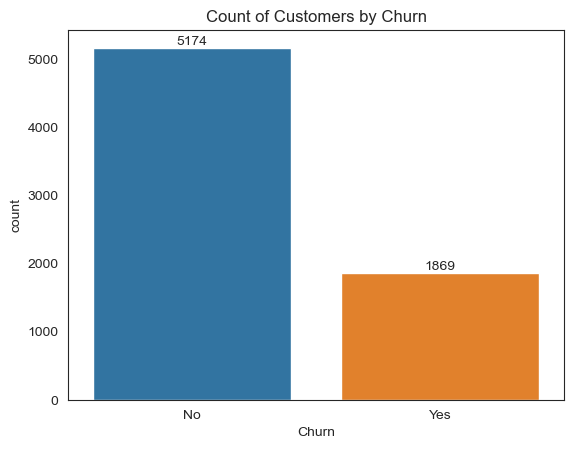

In [40]:
# Count of customers by churn
sns.set_style("white")
churn_count = sns.countplot(x = "Churn" ,data=df,hue='Churn')
churn_count.set_title('Count of Customers by Churn')
churn_count.bar_label(container=churn_count.containers[0])
churn_count.bar_label(container=churn_count.containers[1])

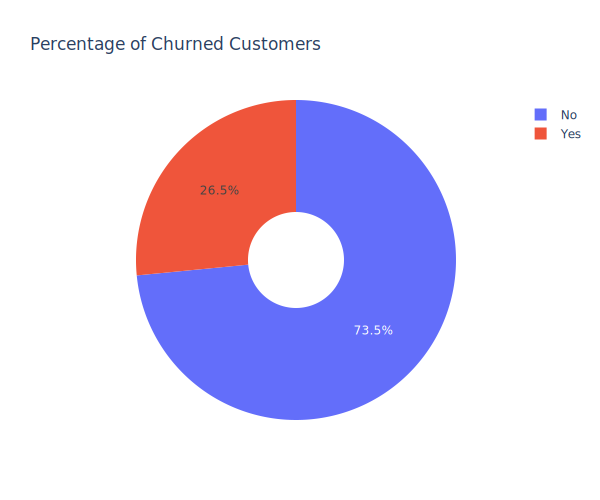

In [42]:
# Percentage of Churned Customers and Not Churned Customers.
churn_percent = df.groupby("Churn").agg({"Churn":"count"})
fig = px.pie(churn_percent, values='Churn', names=churn_percent.index,
             title='Percentage of Churned Customers',
             hole=0.3, 
             width=600,  
             height=500,
            )

fig.show("svg")

Text(0.5, 1.0, 'Distribution of Senior Citizens')

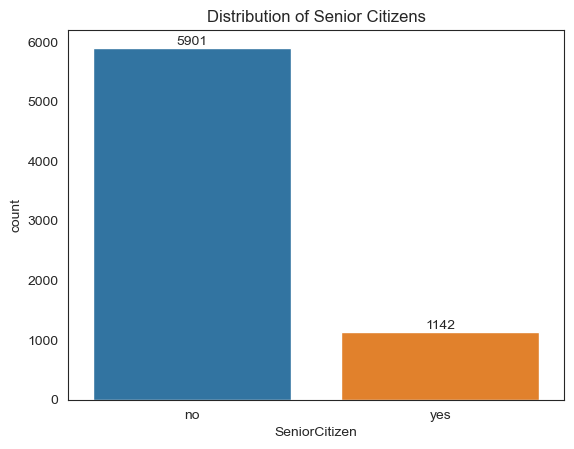

In [44]:
# Distribution of the Senior Citizens 
ax = sns.countplot(x='SeniorCitizen',data=df,hue='SeniorCitizen')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.set_title('Distribution of Senior Citizens')

Text(0.5, 1.0, 'Churn based on Senior Citizens')

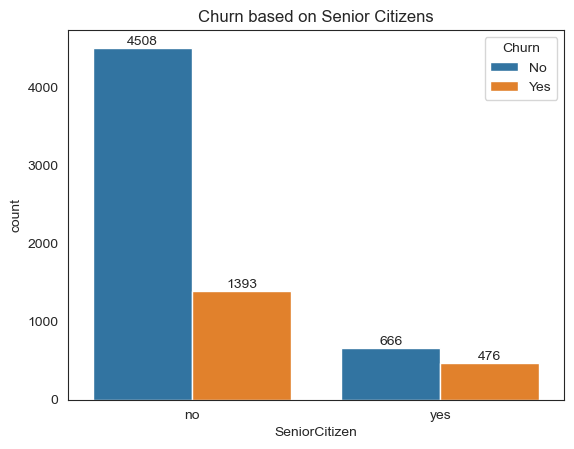

In [46]:
# Churn count based on the Senior Citizens.
ax = sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.set_title('Churn based on Senior Citizens')

Text(0, 0.5, 'Percentage (%)')

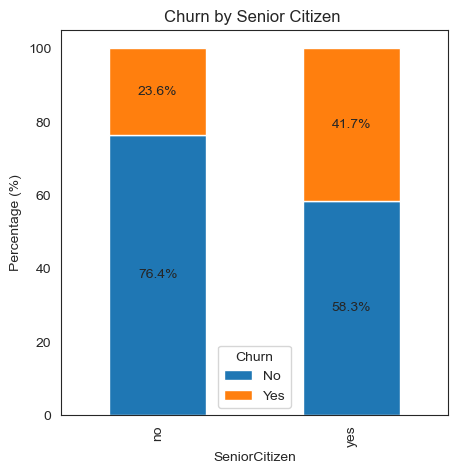

In [48]:
# Stacked Chart of churn based on Senior Citizen.
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

fig, ax = plt.subplots(figsize=(5, 5))

total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen ')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')

Text(0.5, 1.0, 'Churn based on Partner')

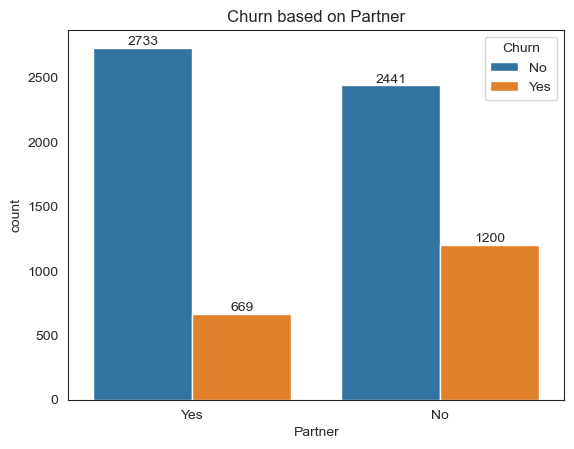

In [50]:
# Churn based on the partner.
ax = sns.countplot(x='Partner',hue='Churn',data=df)
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.set_title('Churn based on Partner')

Text(0.5, 1.0, 'Churn based on Dependents')

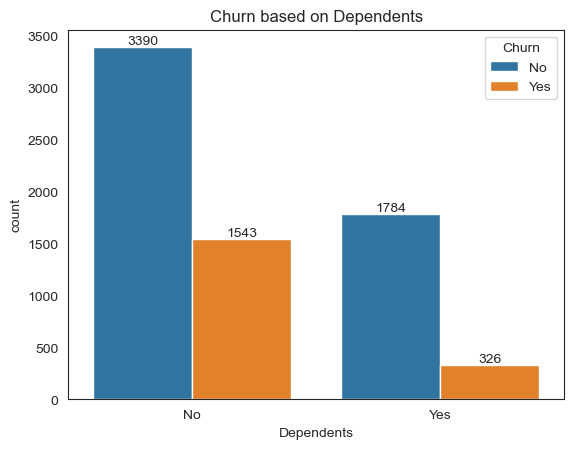

In [52]:
# Churn based on the dependents.
ax = sns.countplot(x='Dependents',hue='Churn',data=df)
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.set_title('Churn based on Dependents')

In [ ]:
# ANALYSIS 1: From the customers most of the senior citizens have churned. 
# The customers who does not have a partner or any dependent tends to churn at a higher rate.

# 2. BASED ON SERVICE'S

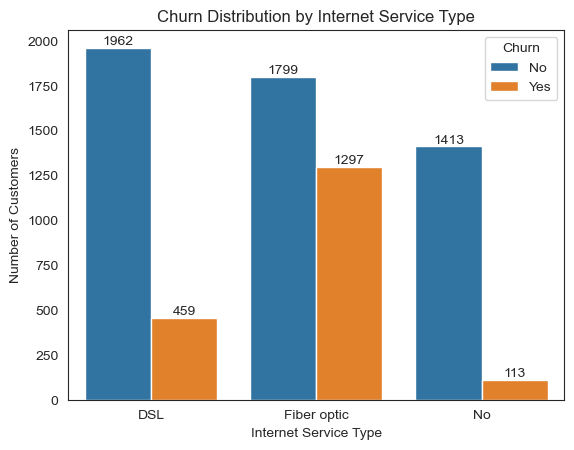

In [54]:
# Churn Distribution based on Internet Service Type

ax=sns.countplot(data=df, x='InternetService', hue='Churn')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

plt.title('Churn Distribution by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')

In [56]:
# ANALYSIS 2: We can see from above plot that the Fiber optic internet service type is making our customers to churn more.

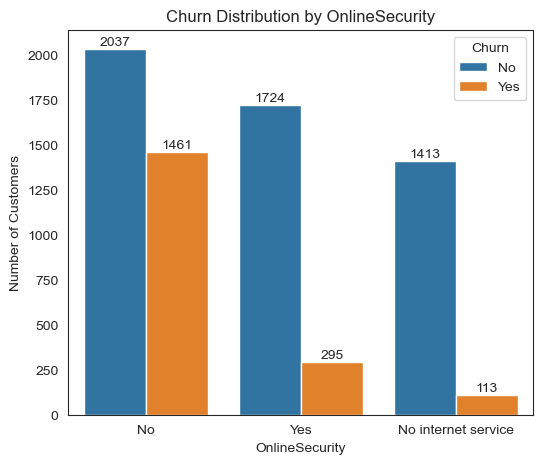

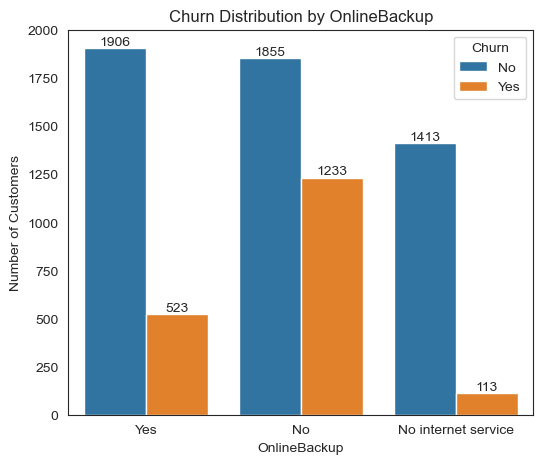

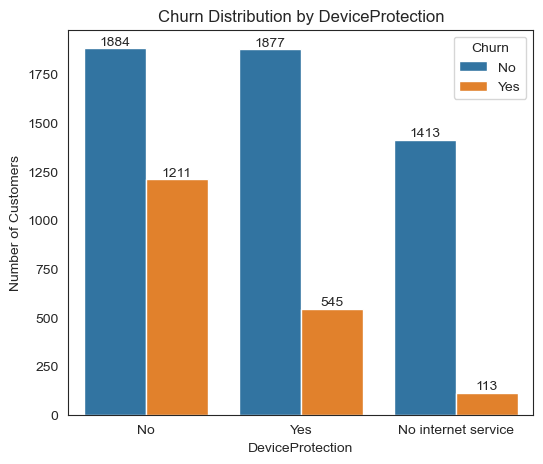

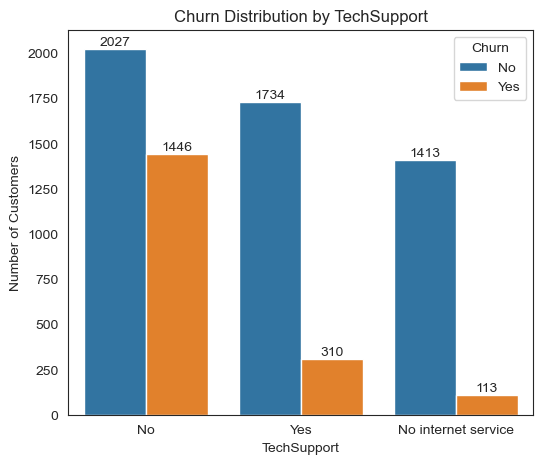

In [58]:
service_name = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']


for service in service_name:
    
    plt.figure(figsize=(6, 5))
    ax=sns.countplot(data=df, x=service, hue='Churn')
    ax.bar_label(container=ax.containers[0])
    ax.bar_label(container=ax.containers[1])
    
    plt.title(f'Churn Distribution by {service}')
    plt.xlabel(service)
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn')

In [60]:
# ANALYSIS 3: From above chart's we can see that customers having no addtional services will tend to Churn.

# 3.BASED ON CUSTOMER ACCOUNT INFORMATION.

Text(0.5, 1.0, 'Contract VS Churn')

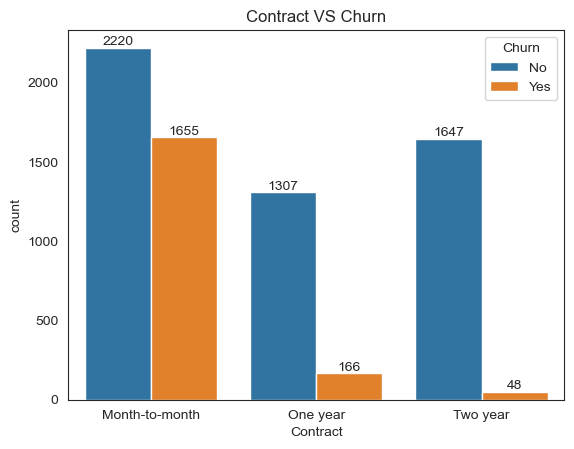

In [63]:
# Contract VS Churn
ax = sns.countplot(x='Contract',data=df,hue="Churn")
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.set_title('Contract VS Churn')

In [65]:
# ANALYSIS 4: Customers who have month to month contract are likely to churn than from those who have 1 or 2 years or contract.

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

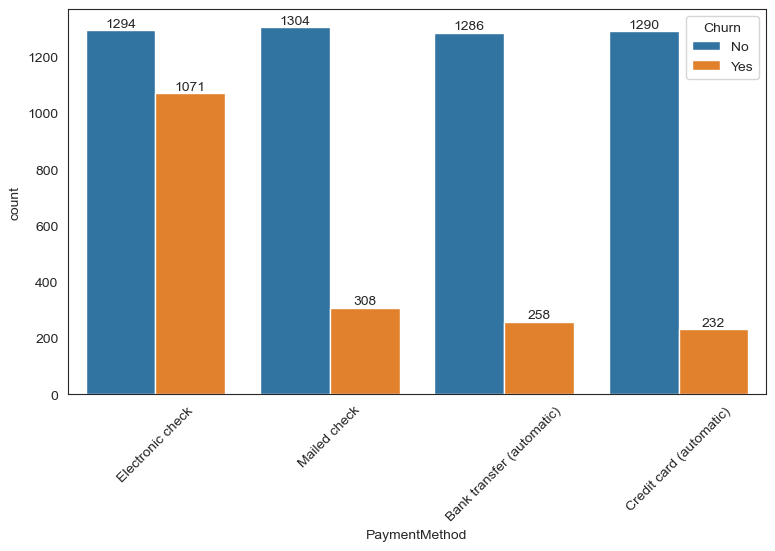

In [67]:
# Churn Vs Payment Method
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='PaymentMethod',data=df,hue="Churn")
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
plt.xticks(rotation=45)

In [69]:
# ANALYSIS 5: The Electronic check payment method customers are churning more than any other payment method.

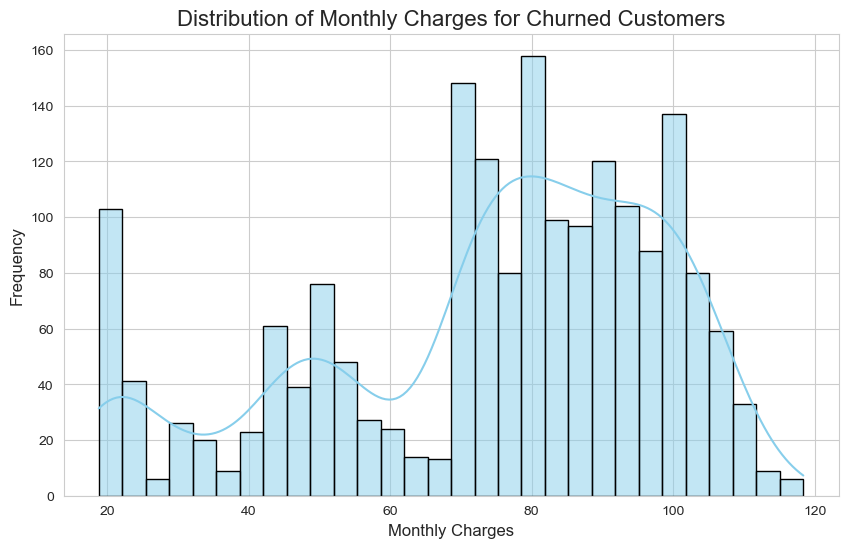

In [71]:
# Monthly charges distribution
churned_customers = df[df['Churn'] == 'Yes']
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))  
sns.histplot(churned_customers['MonthlyCharges'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Charges for Churned Customers', fontsize=16)  
plt.xlabel('Monthly Charges', fontsize=12)  
plt.ylabel('Frequency', fontsize=12)  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  

plt.show()  

In [73]:
# ANALYSIS 6: Due to higher monthly charges there is an increase in the churn of customers.

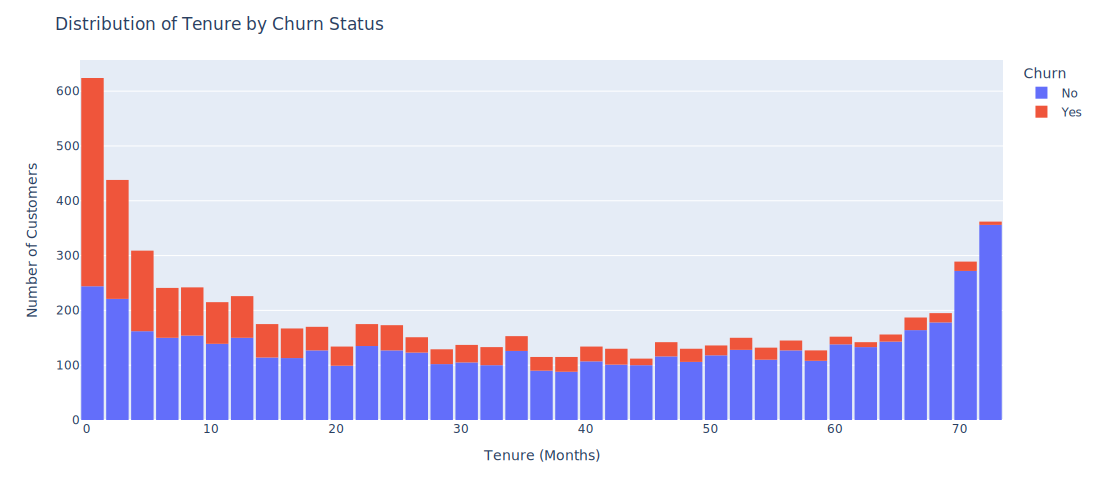

In [75]:
# Histogram based on Churn VS tenure.
fig = px.histogram(df, x="tenure", color="Churn",
                   hover_data=df.columns,width=1100,  
                  height=500)
fig.update_layout(
    title_text='Distribution of Tenure by Churn Status', 
    xaxis_title_text='Tenure (Months)', 
    yaxis_title_text='Number of Customers', 
    bargroupgap=0.1
)
fig.show("svg")

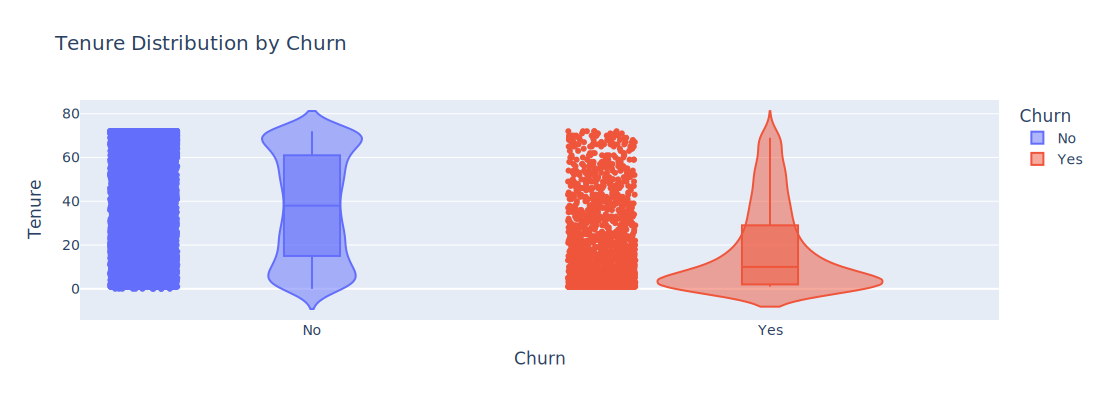

In [77]:
# violin plot based on Churn VS tenure.
fig = px.violin(df, x="Churn", y="tenure", color="Churn",
                 box=True, points="all", 
                 title="Tenure Distribution by Churn")

fig.update_layout(
    xaxis_title="Churn",
    yaxis_title="Tenure",
    font=dict(size=14),
    width=1100,
    height=400
)

fig.show("svg")

In [79]:
# ANALYSIS 7:From the violin chart we can see that there is a correlation between tenure and churn.We can see that the
# customers who have longer tenure tends to stay with the company as compared to the customers with small tenure.

# CONCLUSION:

Based on the analysis and visualization performed on the Telecom-Dataset we can conlude:

DEMOGRAPHIC: The customers who are senior citizens or who does not have any partner or dependent are more likely to churn.We need to provide offers and promotions for this type of customers.

Internet: We need to investigate about the 'Fiber optic' internet service as customers who are using fiber optic are churning at a higher rate.

Additional Services: As people who didnt signed up for additional services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport will churn. We can combine these additional services in a single plan so the churning will be reduced.

Payment Method: We need to check if there is some issue in electronic check as customers are churning at a severe rate using electronic check.

Contract: We need to make offers on long term contracts as customers having yearly based contracts are most likely not to churn.

Tenure: Customers with short tenure have a high risk of leaving. We need to implement some strategy to retain them.
